<a href="https://colab.research.google.com/github/jsh1021902/ai_deeplearning_class/blob/main/chapter04_getting_started_with_neural_networks_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Model 1 (One hidden layer)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Model 2 (Four hidden layer)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Model 3 (tanh activation)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model3 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [39]:
model2.compile(optimizer="rmsprop",
              loss="mean square error",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 71ms/step - loss: 0.6203 - accuracy: 0.6609 - val_loss: 0.5466 - val_accuracy: 0.8518
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4441 - accuracy: 0.8690 - val_loss: 0.3925 - val_accuracy: 0.8595
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3156 - accuracy: 0.9032 - val_loss: 0.3191 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2448 - accuracy: 0.9241 - val_loss: 0.2919 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2000 - accuracy: 0.9370 - val_loss: 0.2817 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1697 - accuracy: 0.9455 - val_loss: 0.2819 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1437 - accuracy: 0.9547 - val_loss: 0.2972 - val_accuracy: 0.8811
Epoch 8/20
3

In [ ]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.5061 - accuracy: 0.7845 - val_loss: 0.3982 - val_accuracy: 0.8582
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3276 - accuracy: 0.8937 - val_loss: 0.3231 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2591 - accuracy: 0.9188 - val_loss: 0.3038 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2173 - accuracy: 0.9300 - val_loss: 0.2911 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1907 - accuracy: 0.9401 - val_loss: 0.2834 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1694 - accuracy: 0.9481 - val_loss: 0.2743 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1524 - accuracy: 0.9527 - val_loss: 0.2776 - val_accuracy: 0.8883
Epoch 8/20
30

In [ ]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5946 - accuracy: 0.7296 - val_loss: 0.4708 - val_accuracy: 0.8277
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3752 - accuracy: 0.8796 - val_loss: 0.3377 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2699 - accuracy: 0.9111 - val_loss: 0.2940 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2107 - accuracy: 0.9276 - val_loss: 0.2966 - val_accuracy: 0.8810
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1751 - accuracy: 0.9413 - val_loss: 0.2928 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1494 - accuracy: 0.9489 - val_loss: 0.2858 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1173 - accuracy: 0.9635 - val_loss: 0.3009 - val_accuracy: 0.8834
Epoch 8/20
30

In [ ]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.4989 - accuracy: 0.7867 - val_loss: 0.3784 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2998 - accuracy: 0.8989 - val_loss: 0.3180 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2227 - accuracy: 0.9238 - val_loss: 0.2886 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1745 - accuracy: 0.9409 - val_loss: 0.2852 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1382 - accuracy: 0.9540 - val_loss: 0.3143 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1109 - accuracy: 0.9654 - val_loss: 0.3298 - val_accuracy: 0.8743
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0927 - accuracy: 0.9699 - val_loss: 0.3795 - val_accuracy: 0.8678
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

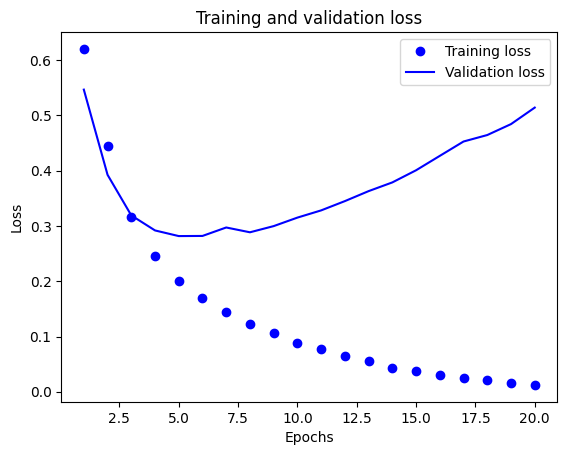

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

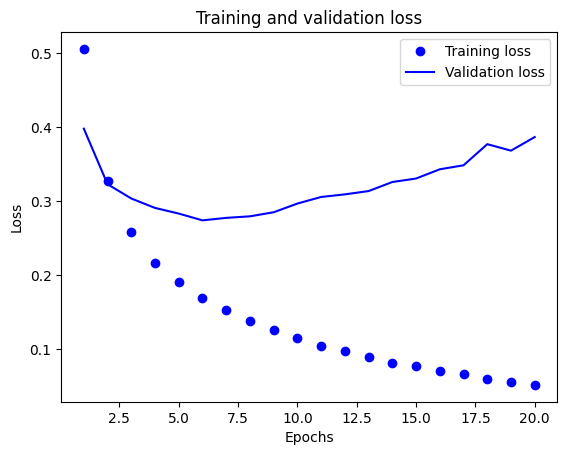

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict1["loss"]
val_loss_values = history_dict1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

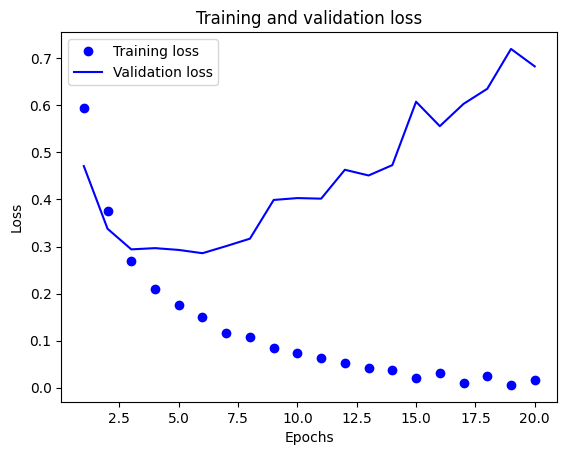

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict2["loss"]
val_loss_values = history_dict2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

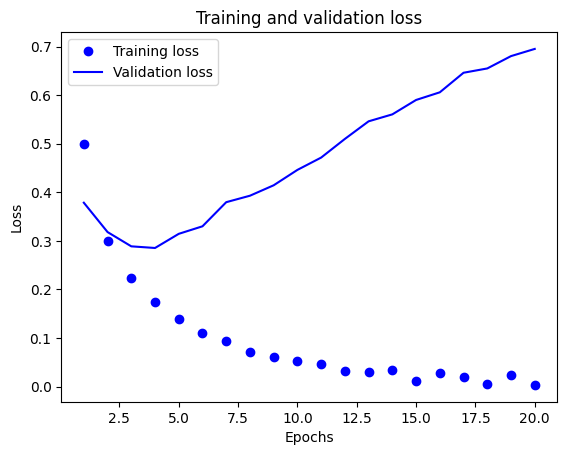

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

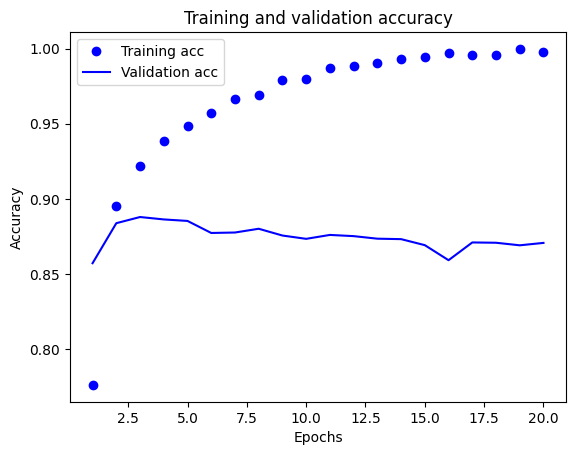

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

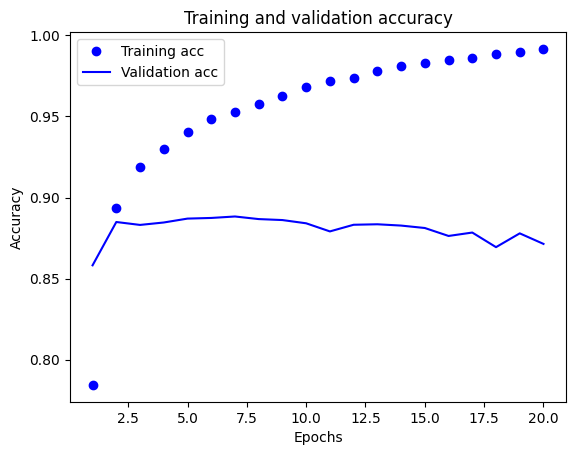

In [ ]:
plt.clf()
acc = history_dict1["accuracy"]
val_acc = history_dict1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

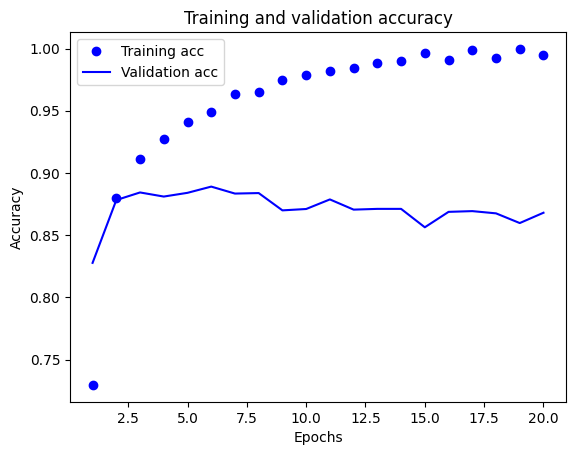

In [ ]:
plt.clf()
acc = history_dict2["accuracy"]
val_acc = history_dict2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

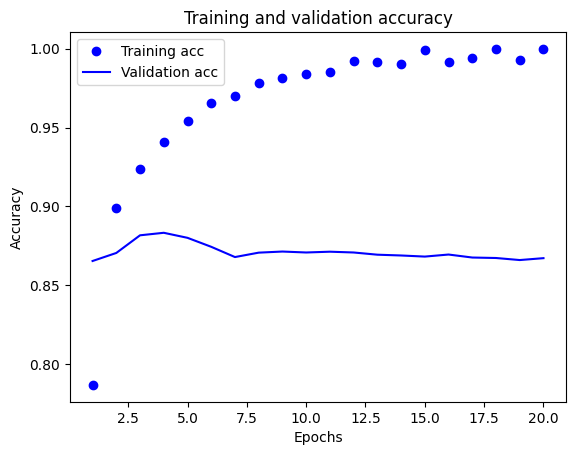

In [ ]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.4859 - accuracy: 0.8194
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2870 - accuracy: 0.8991
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2222 - accuracy: 0.9197
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2824 - accuracy: 0.8869


In [ ]:
results

[0.2824350893497467, 0.8869199752807617]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.01561297],
       [1.        ],
       [0.9157554 ],
       ...,
       [0.00615806],
       [0.01497684],
       [0.95093584]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [40]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [41]:
len(train_data)

8982

In [42]:
len(test_data)

2246

In [43]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [44]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [45]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [46]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [47]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [48]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [49]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

larger Layers

In [60]:
model1 = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Three Hidden Layer

In [61]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [62]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [63]:
model1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [64]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [65]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [66]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 0.1495 - accuracy: 0.9553 - val_loss: 1.0014 - val_accuracy: 0.8050
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1290 - accuracy: 0.9558 - val_loss: 0.9693 - val_accuracy: 0.8170
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1183 - accuracy: 0.9570 - val_loss: 1.0196 - val_accuracy: 0.8030
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.1177 - accuracy: 0.9583 - val_loss: 1.0008 - val_accuracy: 0.7990
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.1148 - accuracy: 0.9582 - val_loss: 0.9452 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.1106 - accuracy: 0.9590 - val_loss: 0.9933 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.1097 - accuracy: 0.9578 - val_loss: 0.9892 - val_accuracy: 0.8120
Epoch 8/20
16

In [67]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.6947 - accuracy: 0.5253 - val_loss: 1.9042 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.5302 - accuracy: 0.7152 - val_loss: 1.3572 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1018 - accuracy: 0.7790 - val_loss: 1.1286 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8593 - accuracy: 0.8262 - val_loss: 1.0057 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6961 - accuracy: 0.8624 - val_loss: 0.9340 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5751 - accuracy: 0.8876 - val_loss: 0.8701 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4837 - accuracy: 0.9039 - val_loss: 0.8345 - val_accuracy: 0.8210
Epoch 8/20
16

In [68]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 35ms/step - loss: 2.9863 - accuracy: 0.3816 - val_loss: 1.9619 - val_accuracy: 0.5850
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.6377 - accuracy: 0.6606 - val_loss: 1.4386 - val_accuracy: 0.6750
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2481 - accuracy: 0.7233 - val_loss: 1.2801 - val_accuracy: 0.6950
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0234 - accuracy: 0.7681 - val_loss: 1.1526 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8391 - accuracy: 0.8140 - val_loss: 1.0624 - val_accuracy: 0.7690
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6885 - accuracy: 0.8473 - val_loss: 1.0509 - val_accuracy: 0.7630
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5862 - accuracy: 0.8701 - val_loss: 0.9694 - val_accuracy: 0.7980
Epoch 8/20
16

**Plotting the training and validation loss**

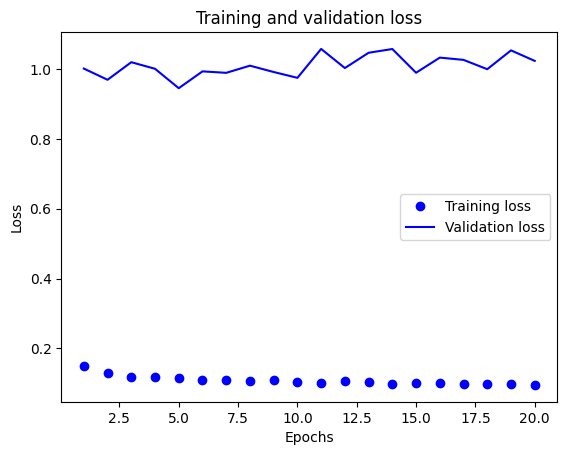

In [69]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

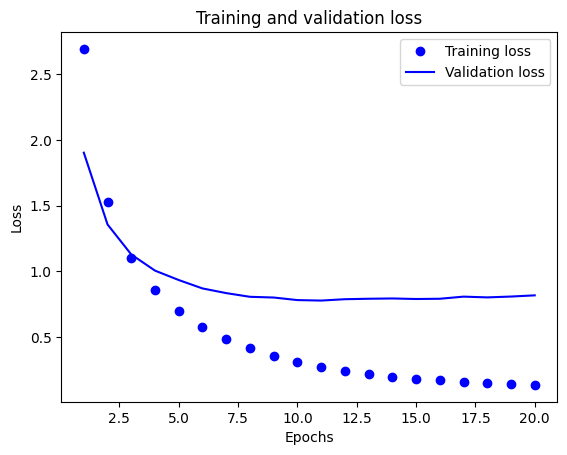

In [70]:
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

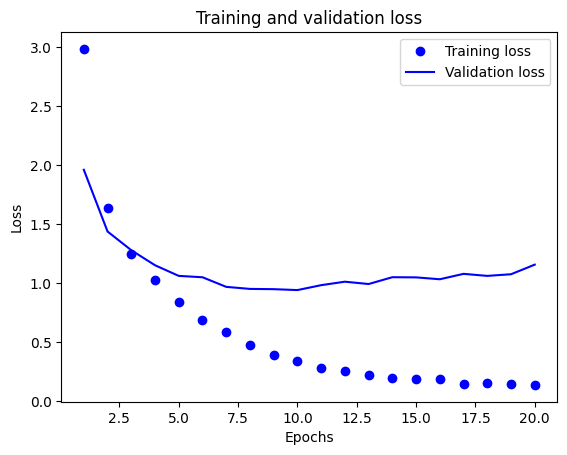

In [71]:
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

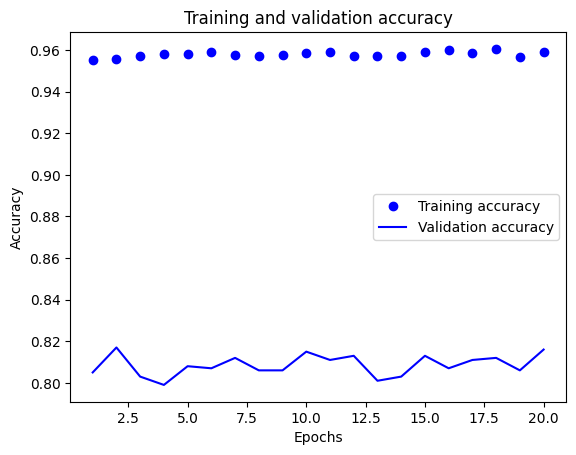

In [72]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

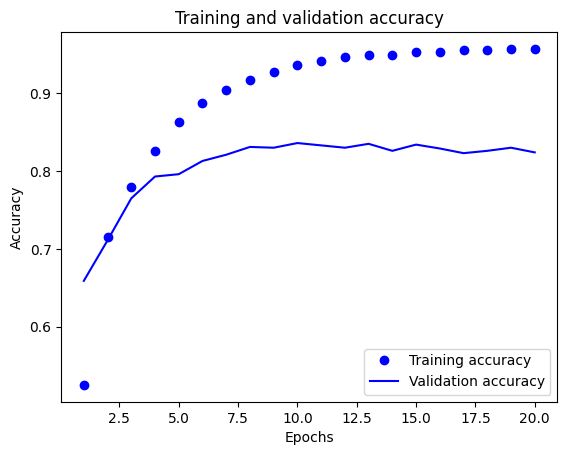

In [73]:
plt.clf()
acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

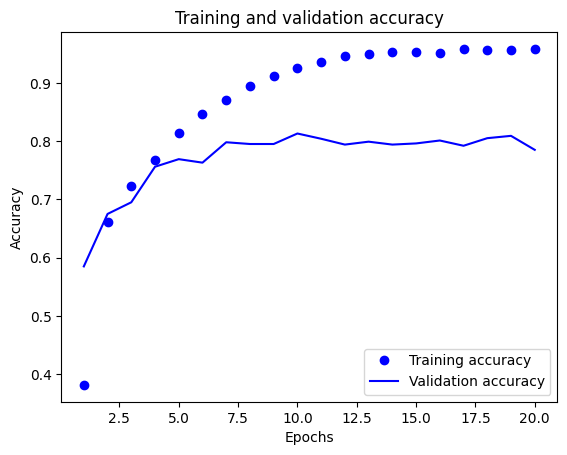

In [74]:
plt.clf()
acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [75]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.5549 - accuracy: 0.5080
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.4450 - accuracy: 0.6844
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1054 - accuracy: 0.7541
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8884 - accuracy: 0.8092
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7363 - accuracy: 0.8439
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.6010 - accuracy: 0.8732
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4994 - accuracy: 0.8939
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4189 - accuracy: 0.9077
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9077 - accuracy: 0.7894


In [76]:
results

[0.9076701402664185, 0.7894033789634705]

In [77]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1923419412288513

### Generating predictions on new data

In [78]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [79]:
predictions[0].shape

(46,)

In [80]:
np.sum(predictions[0])

0.9999999

In [81]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [82]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [83]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [84]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 11ms/step - loss: 2.5512 - accuracy: 0.4372 - val_loss: 1.8340 - val_accuracy: 0.5610
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.5947 - accuracy: 0.5966 - val_loss: 1.4677 - val_accuracy: 0.6300
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3057 - accuracy: 0.6764 - val_loss: 1.3319 - val_accuracy: 0.6920
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1454 - accuracy: 0.7284 - val_loss: 1.2593 - val_accuracy: 0.7030
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0371 - accuracy: 0.7419 - val_loss: 1.2265 - val_accuracy: 0.7050
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9497 - accuracy: 0.7526 - val_loss: 1.2186 - val_accuracy: 0.7010
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8761 - accuracy: 0.7621 - val_loss: 1.2004 - val_accuracy: 0.7080
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [85]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [86]:
train_data.shape

(404, 13)

In [87]:
test_data.shape

(102, 13)

In [88]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [89]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [90]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

varying the number of units per layer

In [101]:
def build_model():
    model1 = keras.Sequential([
        layers.Dense(100, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(1)
    ])
    model1.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

varying the number of layers in the model

In [102]:
def build_model():
    model2 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model2.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [91]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [92]:
all_scores

[1.9622987508773804, 2.3703458309173584, 2.389411211013794, 2.2965338230133057]

In [93]:
np.mean(all_scores)

2.2546474039554596

In [109]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model1 = build_model()
    model1.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [110]:
all_scores

[0.8523983955383301,
 0.8185882568359375,
 0.9534174203872681,
 0.6981668472290039]

In [111]:
np.mean(all_scores)

0.8306427299976349

In [105]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model2 = build_model()
    model2.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [106]:
all_scores

[1.0887415409088135,
 1.3019291162490845,
 1.1171486377716064,
 0.8411211967468262]

In [108]:
np.mean(all_scores)

1.0872351229190826

**Saving the validation logs at each fold**

In [94]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [113]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model1 = build_model()
    history1 = model1.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history1 = history1.history["val_mae"]
    all_mae_histories.append(mae_history1)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model2 = build_model()
    history2 = model1.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history2 = history2.history["val_mae"]
    all_mae_histories.append(mae_history2)

**Building the history of successive mean K-fold validation scores**

In [95]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [114]:
average_mae_history1 = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [115]:
average_mae_history2 = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

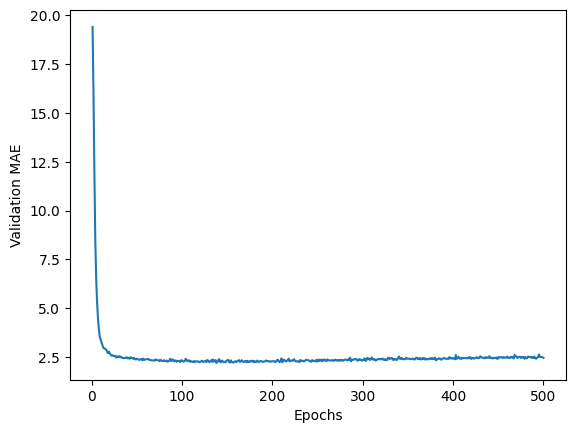

In [96]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

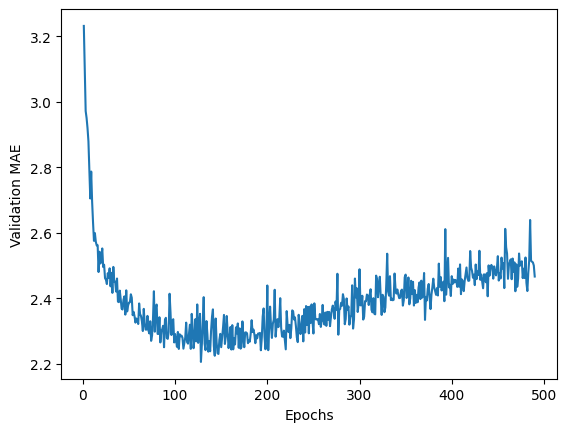

In [97]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [98]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.1049 - mae: 2.7407


In [99]:
test_mae_score

2.7406930923461914

### Generating predictions on new data

In [100]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([9.305576], dtype=float32)

### Wrapping up

## Summary